In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
sns.set_style('whitegrid')
sns.set_context("poster", font_scale = 1, rc={"lines.linewidth": 2})

In [3]:
intopt_unweighted = pd.read_csv("Unweighted_knapsack.csv")
intopt_weighted = pd.read_csv("weighted_knapsack.csv")
qptl_weighted = pd.read_csv("../weighted_QPTL.csv")
spo_weighted = pd.read_csv("../weightedSPO_timelimit.csv")

qptl_unweighted = pd.read_csv("../Unweighted_QPTL.csv")
spo_unweighted = pd.read_csv("../UnweightedSPO_timelimit.csv")


In [4]:
spo_weighted = spo_weighted[ (spo_weighted['training_relaxation']==True)&(spo_weighted['validation_relaxation']==True)]
qptl_weighted['model'] ="QPTL"
spo_weighted['model'] = "SPO-relax"
intopt_weighted['model'] = "intopt"
spo_weighted=spo_weighted.rename(columns = {'train_loss':'training_mse','train_regret_full':'training_regret',
                               'train_accuracy':'training_accuracy','validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })
spo_unweighted = spo_unweighted[ (spo_unweighted['training_relaxation']==True)&(spo_unweighted['validation_relaxation']==True)]
qptl_unweighted['model'] ="QPTL"
spo_unweighted['model'] = "SPO-relax"
intopt_unweighted['model'] = "intopt"
spo_unweighted=spo_unweighted.rename(columns = {'train_loss':'training_mse','train_regret_full':'training_regret',
                               'train_accuracy':'training_accuracy','validation_loss':'validation_mse',
                                           'validation_regret_full':'validation_regret',
                                           'test_loss':'test_mse','test_regret_full':'test_regret'
                                           })

In [46]:
plotting_df = pd.concat([spo_unweighted,qptl_unweighted,intopt_unweighted],sort=False)

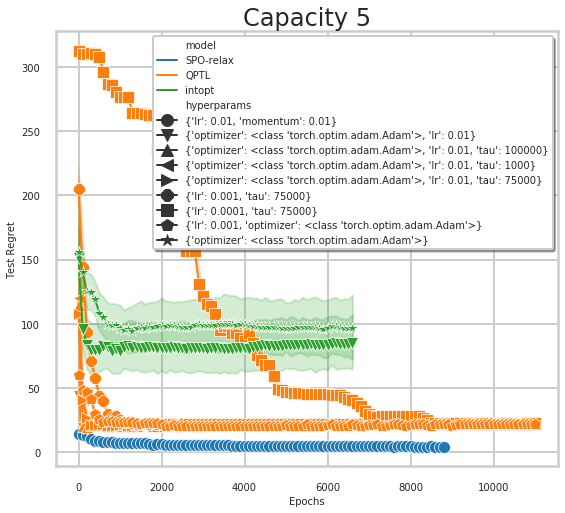

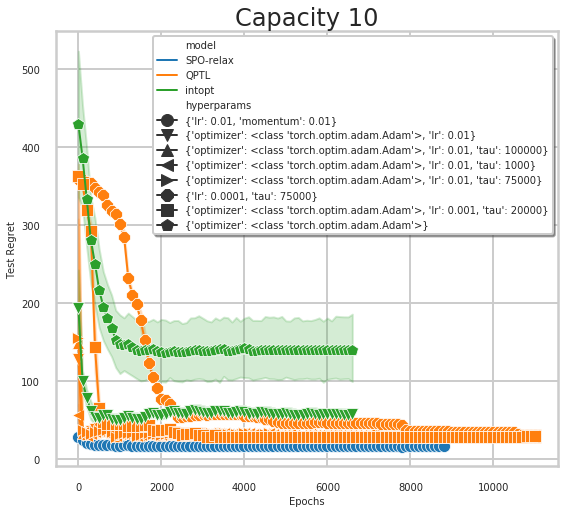

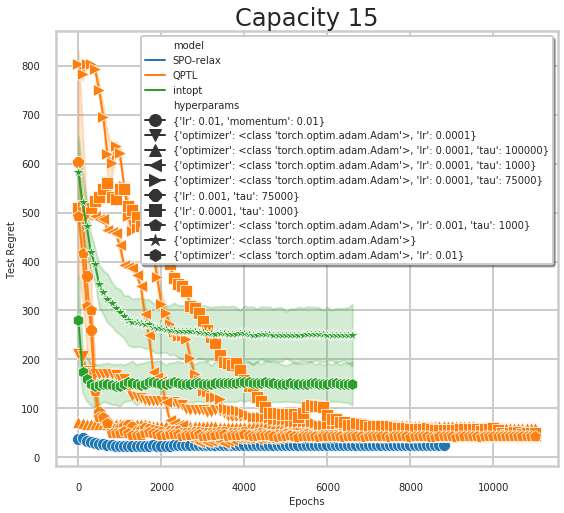

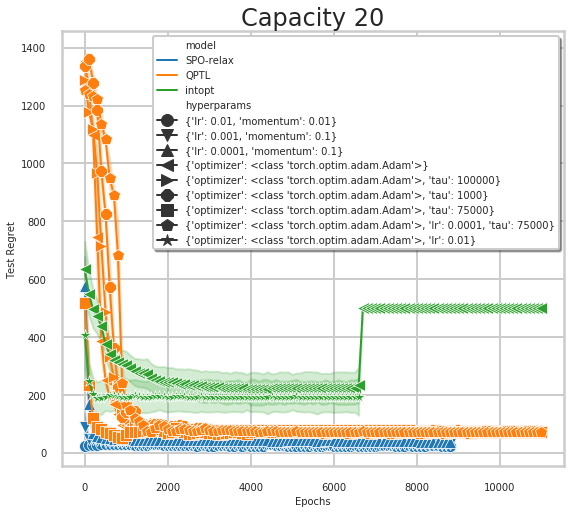

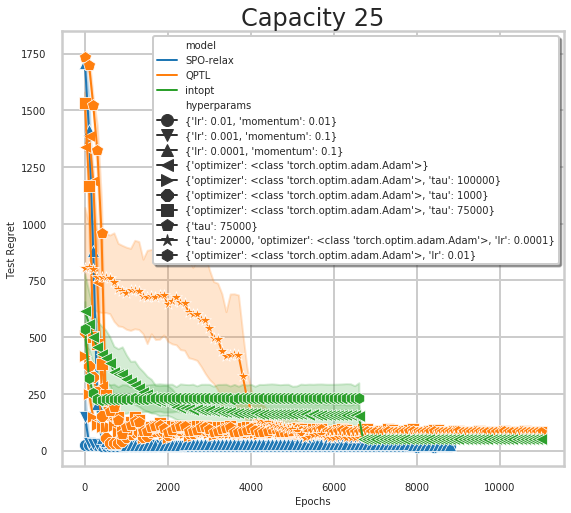

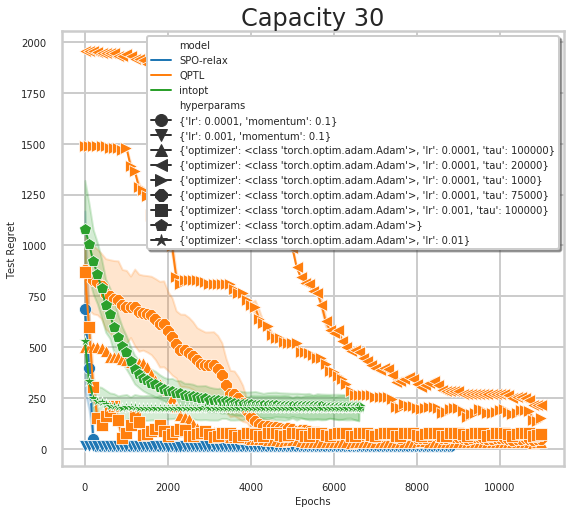

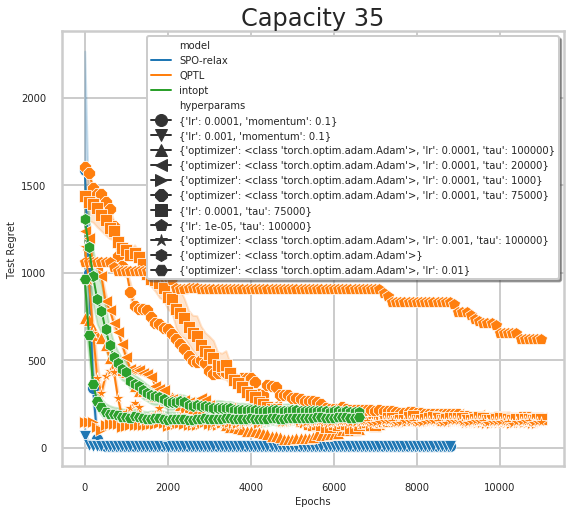

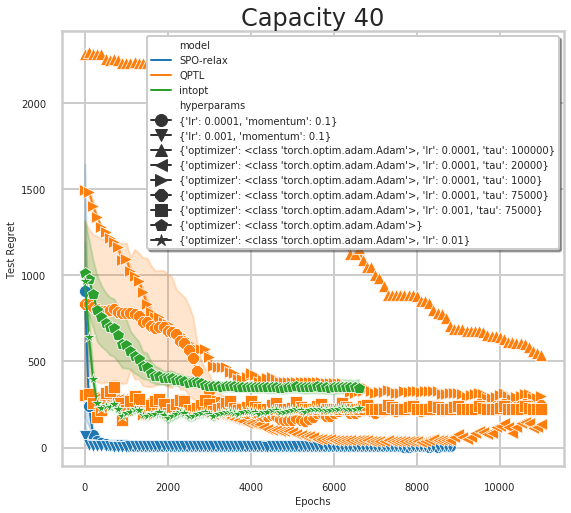

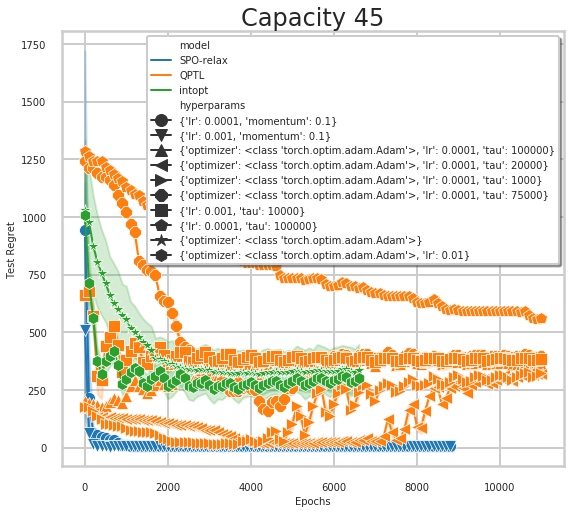

In [47]:

plotting_df.subepoch = plotting_df.subepoch.round(decimals=-2)
for capa in plotting_df.capacity.unique():
    
    fig, ax = plt.subplots(1, 1, figsize=(9,8))
    g = sns.lineplot(x='subepoch', y='test_regret',
                     markers=['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'], 
                     dashes=False,legend="full", style="hyperparams",hue="model",ax=ax, 
                     data = plotting_df[plotting_df['capacity']==capa])
    g.legend( fancybox=True, shadow=True,fontsize =10)
    ax.set_xlabel("Epochs",fontsize= 10)
    ax.set_ylabel("Test Regret",fontsize= 10)
    ax.tick_params(axis="y",labelsize=10)
    ax.tick_params(axis="x",labelsize=10)
    plt.title("Capacity %d"%capa)
    #ax.set_ylim(0,1500)

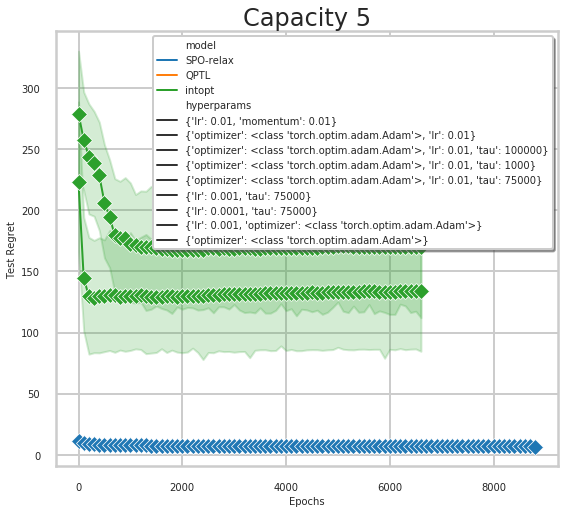

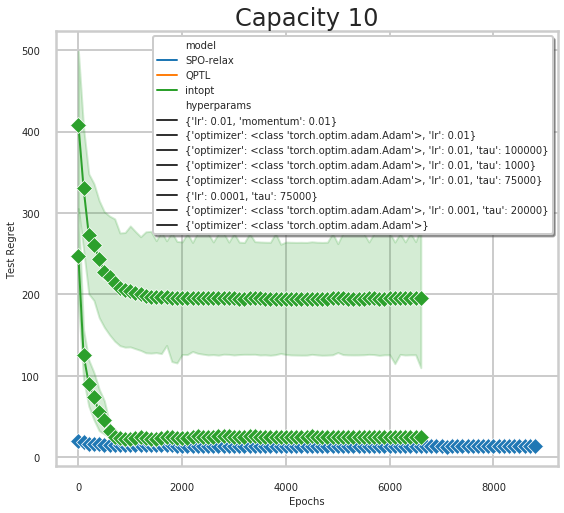

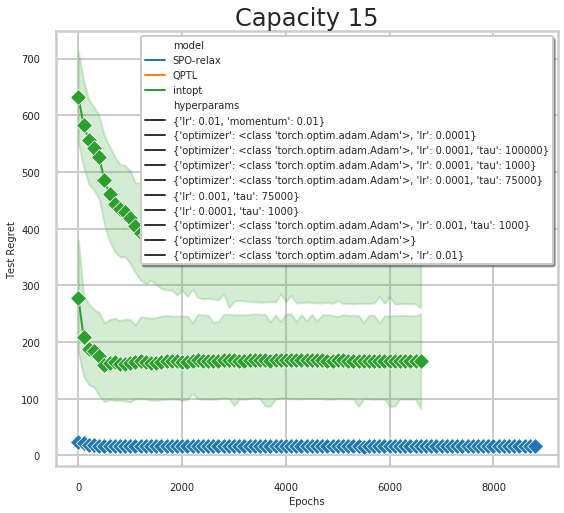

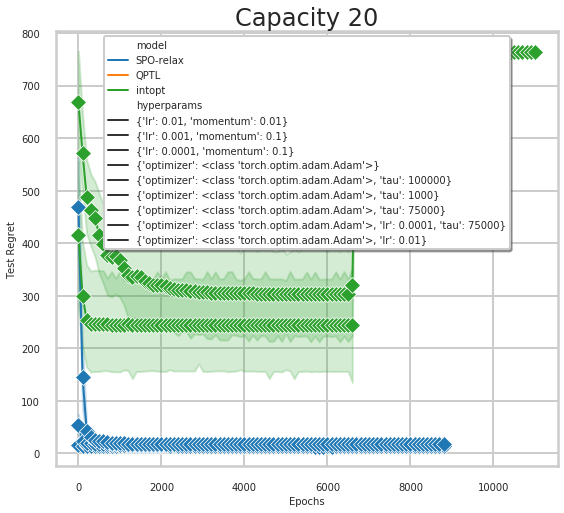

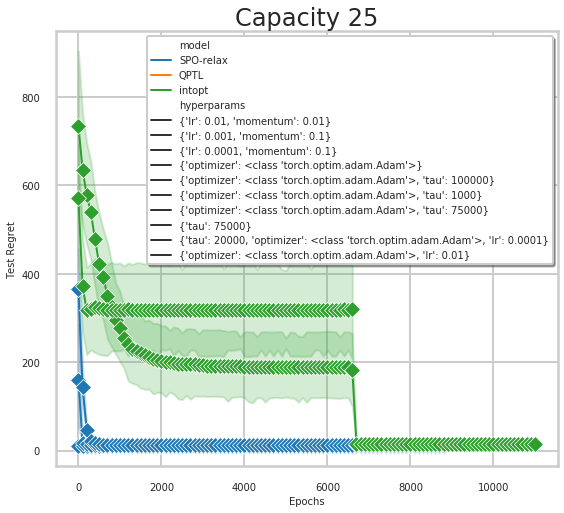

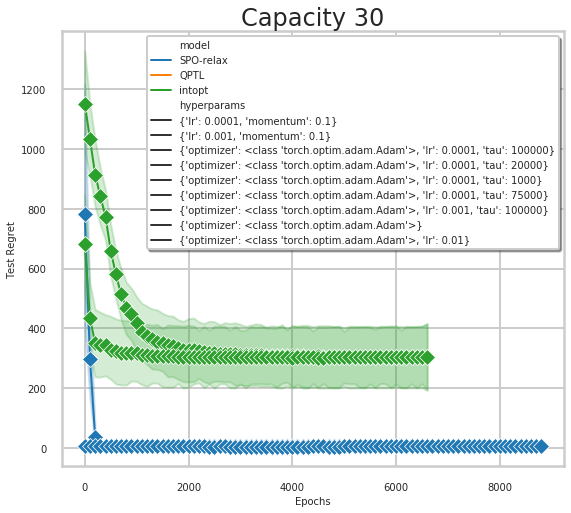

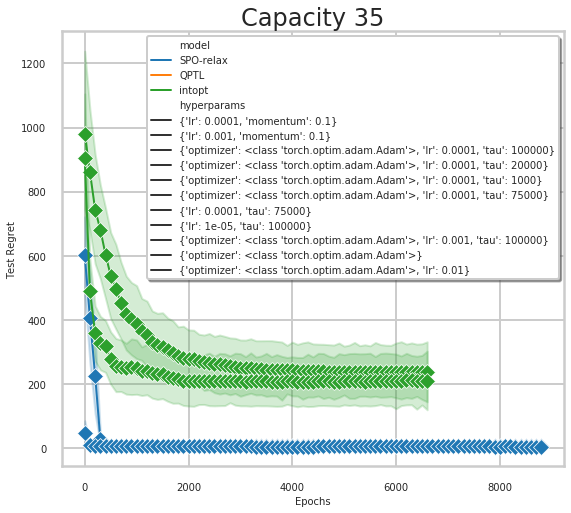

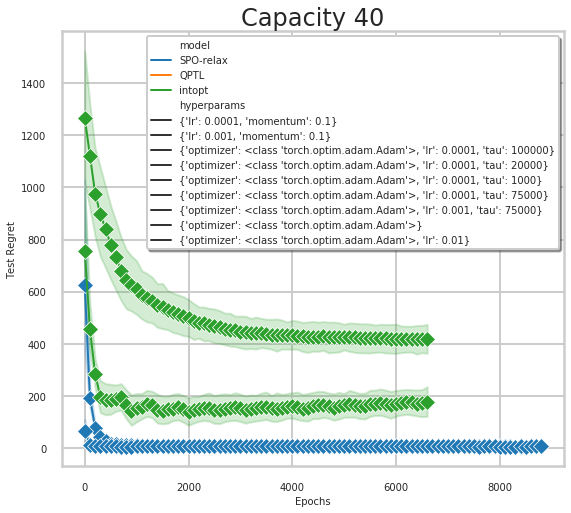

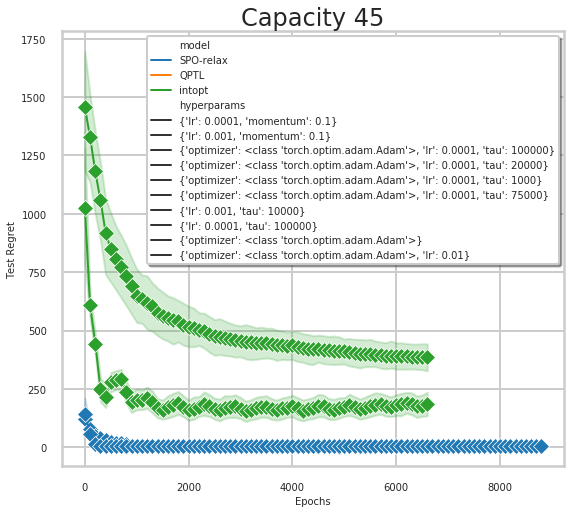

In [23]:
for capa in plotting_df.capacity.unique():
    fig, ax = plt.subplots(1, 1, figsize=(9,8))
    g = sns.lineplot(x='subepoch', y='training_regret',
                     marker="D", dashes=False,
                      legend="full", style="hyperparams",hue="model",ax=ax, 
                     data = plotting_df[plotting_df['capacity']==capa])
    g.legend( fancybox=True, shadow=True,fontsize =10)
    ax.set_xlabel("Epochs",fontsize= 10)
    ax.set_ylabel("Test Regret",fontsize= 10)
    ax.tick_params(axis="y",labelsize=10)
    ax.tick_params(axis="x",labelsize=10)
    plt.title("Capacity %d"%capa)

In [33]:
plotting_df = pd.concat([spo_weighted,qptl_weighted,intopt_weighted],sort=False)

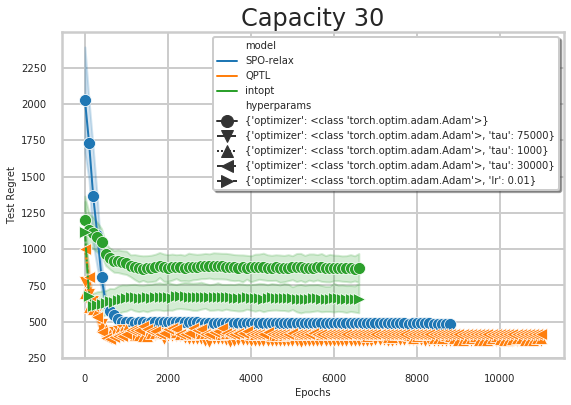

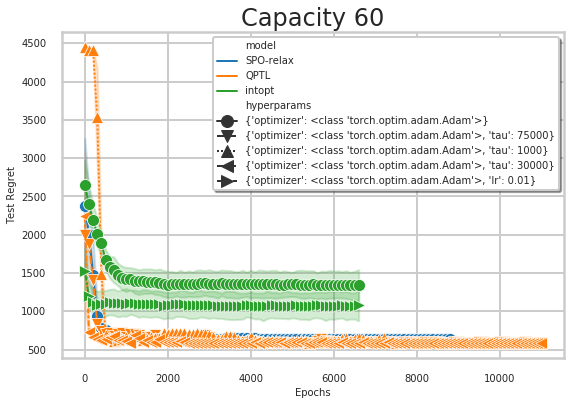

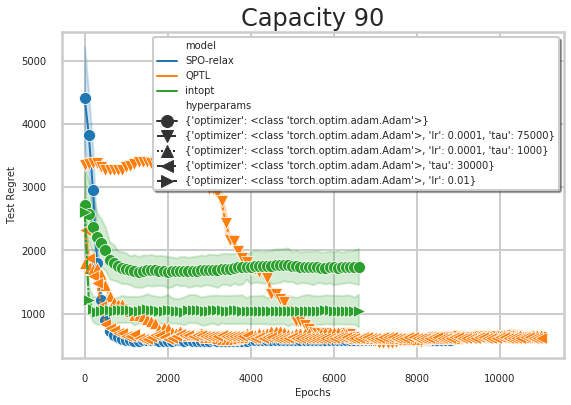

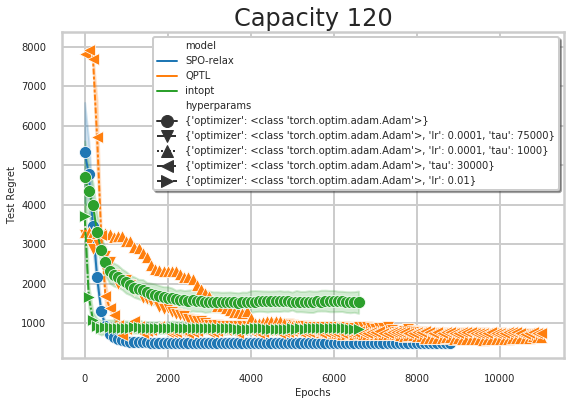

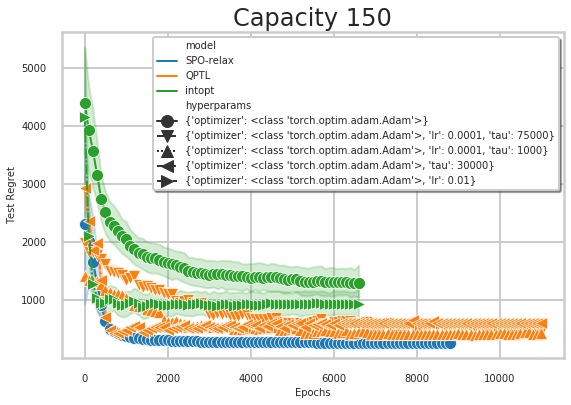

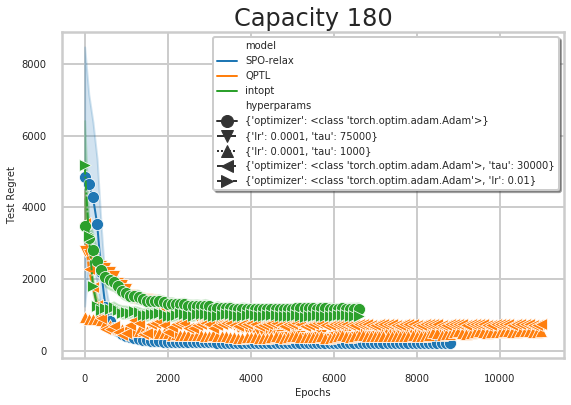

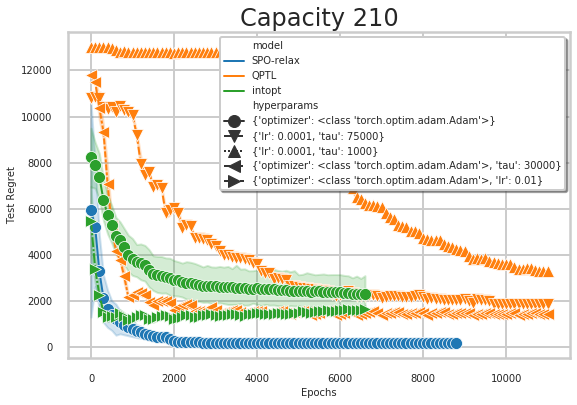

In [43]:

plotting_df.subepoch = plotting_df.subepoch.round(decimals=-2)
for capa in plotting_df.capacity.unique():
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    g = sns.lineplot(x='subepoch', y='test_regret',
                      legend="full", style="hyperparams",hue="model",ax=ax, 
                     markers=['o', 'v', '^', '<', '>', '8', 's'], 
                     data = plotting_df[plotting_df['capacity']==capa])
    g.legend( fancybox=True, shadow=True,fontsize =10)
    ax.set_xlabel("Epochs",fontsize= 10)
    ax.set_ylabel("Test Regret",fontsize= 10)
    ax.tick_params(axis="y",labelsize=10)
    ax.tick_params(axis="x",labelsize=10)
    plt.title("Capacity %d"%capa)

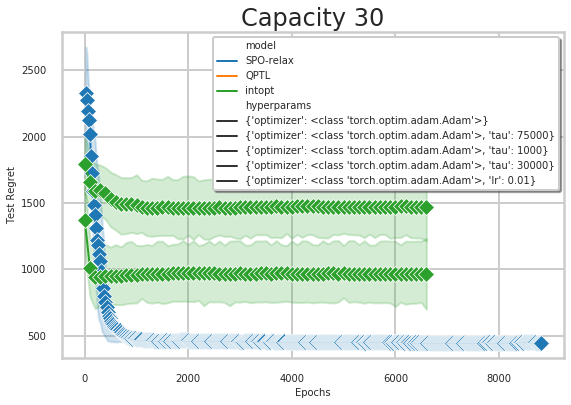

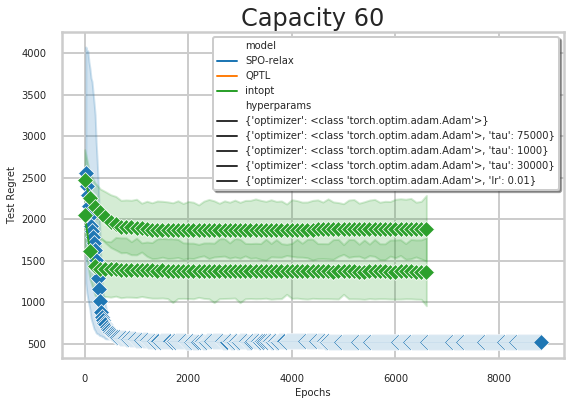

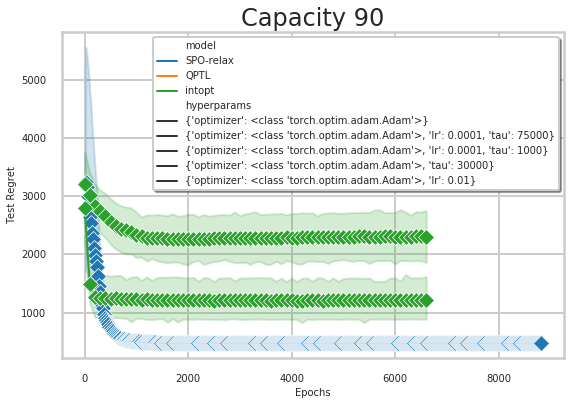

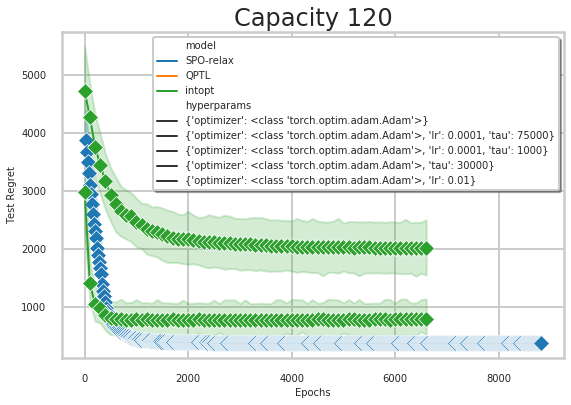

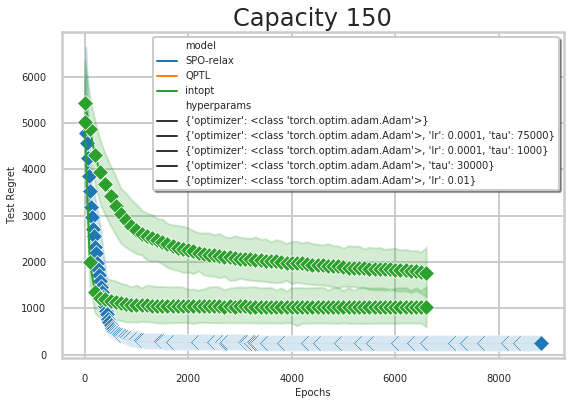

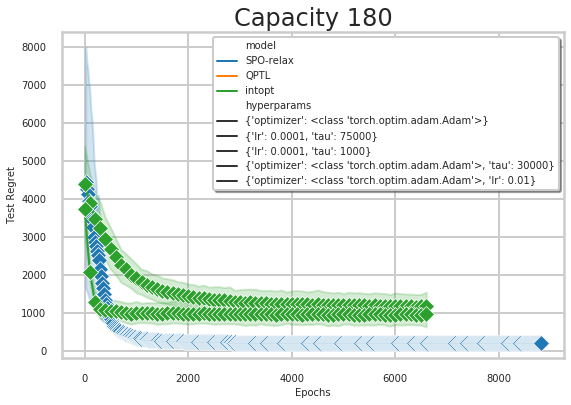

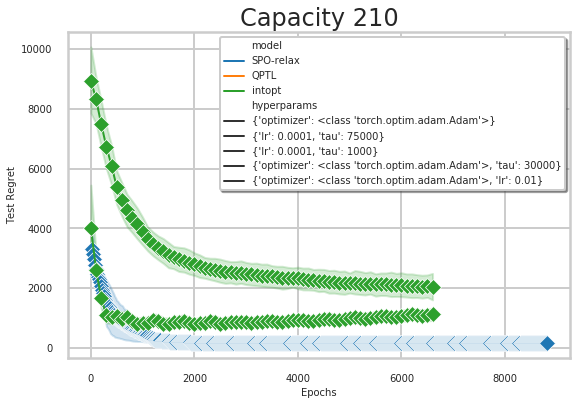

In [34]:
for capa in plotting_df.capacity.unique():
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    g = sns.lineplot(x='subepoch', y='training_regret',
                     marker="D", dashes=False,
                      legend="full", style="hyperparams",hue="model",ax=ax, 
                     data = plotting_df[plotting_df['capacity']==capa])
    g.legend( fancybox=True, shadow=True,fontsize =10)
    ax.set_xlabel("Epochs",fontsize= 10)
    ax.set_ylabel("Test Regret",fontsize= 10)
    ax.tick_params(axis="y",labelsize=10)
    ax.tick_params(axis="x",labelsize=10)
    plt.title("Capacity %d"%capa)